[0.0, 33.33333333333333, 33.333333333333336, 41.66666666666666, 46.66666666666665, 49.999999999999986, 57.14285714285714, 62.5, 66.66666666666667, 65.0]
[2, 102, 202, 302, 402, 502, 602, 702, 802, 902]


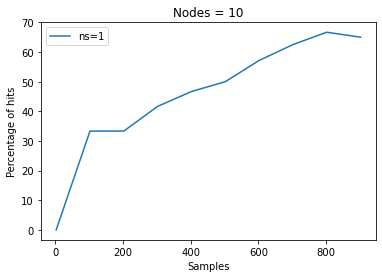

[0.0, 21.428571428571423, 30.952380952380953, 35.71428571428571, 43.57142857142857, 42.97619047619048, 43.9795918367347, 44.73214285714286, 44.52380952380952, 50.07142857142857]
[2, 102, 202, 302, 402, 502, 602, 702, 802, 902]
[0.0, 21.428571428571423, 21.69312169312168, 32.93650793650794, 37.46031746031746, 45.50264550264551, 53.28798185941043, 56.00198412698412, 56.72398589065255, 59.62301587301586]
[2, 102, 202, 302, 402, 502, 602, 702, 802, 902]
[0.0, 30.0, 31.904761904761894, 42.11038961038962, 42.259740259740255, 40.772005772005784, 47.804576376004945, 51.20400432900433, 56.62578162578163, 60.96320346320346]
[2, 102, 202, 302, 402, 502, 602, 702, 802, 902]


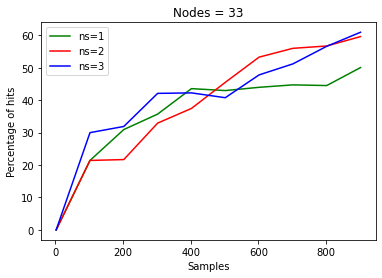

C:\Users\gisel\anaconda3\lib\site-packages\conditional_independence\suffstats\ci_suffstats\partial_correlation_suffstat.py:37: RuntimeWarning: invalid value encountered in sqrt
  rho = K/sqrt(diag(K))/sqrt(diag(K))[:, None]  # sample partial correlation matrix


In [ ]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
import seaborn as sns
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot

hits=[]
perc_hits=[]
samples=[]

def percentage(percent, whole):
  return (percent/whole) * 100.0

def causalInference (n, ns):
    hits=[]
    perc_hits=[]
    samples=[]
    for i in range (2,15000,50):
        for j in range(10):
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
            p = X1.shape[1]
            difference_matrix = dci(X1, X2, difference_ug=list(itr.combinations(range(p), 2)))
            ddag_edges = set(zip(*np.where(difference_matrix != 0)))
            same_values = set(true_difference) & set(ddag_edges)
            diff_values = set(ddag_edges) ^ set(true_difference)
            tot_values = set(ddag_edges) | set(true_difference)
            hits.append(percentage(len(same_values), len(tot_values)))
        perc_hits.append(np.mean(hits))
        samples.append(i)
    print(perc_hits)
    print(samples)
    return perc_hits, samples

p_hits=[]
s=[]
nodes = [10, 33, 55, 77, 100]
color = ['g','r','b']

for n in nodes:
    if n==10:
        ns=1
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = "ns=1")
        plt.title("Nodes = 10")
        plt.xlabel("Samples")
        plt.ylabel("Percentage of hits")
        plt.legend()
        plt.show()
    elif n==33:
        ns = [1,2,3]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 33")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==55:
        ns = [2,4,6]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 55")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==77:
        ns = [3,5,7]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 77")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==100:
        ns = [3,6,10]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 100")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()



In [ ]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
import seaborn as sns
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot

hits=[]
perc_hits=[]
samples=[]

def percentage(percent, whole):
  return (percent/whole) * 100.0

def causalInference (n, ns):
    hits=[]
    perc_hits=[]
    samples=[]
    for i in range (2,10000,100):
        for j in range(10):
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
            p = X1.shape[1]
            difference_matrix = dci(X1, X2, difference_ug=list(itr.combinations(range(p), 2)))
            ddag_edges = set(zip(*np.where(difference_matrix != 0)))
            same_values = set(true_difference) & set(ddag_edges)
            diff_values = set(ddag_edges) ^ set(true_difference)
            tot_values = set(ddag_edges) | set(true_difference)
            hits.append(percentage(len(same_values), len(tot_values)))
        perc_hits.append(np.mean(hits))
        samples.append(i)
    print(perc_hits)
    print(samples)
    return perc_hits, samples


p_hits=[]
s=[]
nodes = [10, 33, 55, 77, 100]


for n in nodes:
    if n==10:
        ns = 1
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 10"), color = 'g')
    elif n==33:
        ns = 1
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 33"), color = 'r')
    elif n==55:
        ns = 2
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 55"), color = 'b')
    elif n==77:
        ns = 3
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 77"), color = 'y')
    elif n==100:
        ns = 3
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 100"), color = 'm')
    plt.title("Percentage of hits at 10%")
    plt.xlabel("Samples")
    plt.ylabel("Percentage of hits")
    plt.legend()
    plt.show()

In [29]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot
from scipy.stats import bootstrap
import random
import sklearn
from collections import defaultdict


ns=1
nodes = 10
count_dict = defaultdict(lambda: "Not Present")

for i in range (21,1000,100): #if we start <=20, there are no edges
    #for j in range(10):
    X1, X2, true_difference = create_synthetic_difference(nnodes=nodes, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
    p = X1.shape[1]
    #print(list(ddag_edges)[0])
    
    # Bootstrapping
    # Tenemos matriz de muestras X1 y X2 (nsamples, nnodes)
    #X1 y X2 van a tener el mismo numero de filas, aunque por si en algún caso quisieramos probar algo distinto prefiero hacer la distinción.
    number_of_rows1 = X1.shape[0]
    number_of_rows2 = X2.shape[0]

    # for n in n_reps:
    #n_reps = 10 #1000
    
    #coger muestra aleatoria --> Elegimos un número de fila aleatoria
    row1 = np.random.choice(number_of_rows1, X1.shape[0], replace=True)
    row2 = np.random.choice(number_of_rows2, X2.shape[0], replace=True)
    new_X1 = X1[row1, :]
    new_X2 = X2[row2, :]

    difference_matrix = dci(new_X1, new_X2, difference_ug=list(itr.combinations(range(new_X1.shape[1]), 2)))
    ddag_edges = set(zip(*np.where(difference_matrix != 0)))
    print(list(ddag_edges)[0])
    edges_list = list(ddag_edges)
    #val = [''.join(i) for i in edges_list]
    #print(str(res))

    #for i in ddag_edges2:
     #   if count_dict[val] == "Not Present":
      #      key = val
       #     value = 1
        #    count_dict.update({key: value})
        #else:
         #   count_dict[val] += 1

#print(count_dict)
# evaluate model
#accuracy_score no tiene en cuenta el orden, quizá sería mejor idea comprobar el porcentaje de similitud entre predicciones y original como lo hice para las gráficas
#score1 = accuracy_score(X1, X1p)
#score2 = accuracy_score(X2, X2p)
#accuracy1.append(score1)
#accuracy2.append(score2)

#for i in edge_list
# para cada edge en ddag_edges
#count_dict["(5,3)"] +=1

# si un arco sale en todas ---: muy seguros
# si un arco sale en 33% extraemos 0.33

(8, 5)
(8, 9)
(9, 0)
(9, 0)
(9, 7)
(9, 0)
(9, 0)
(9, 0)
(5, 9)
(9, 0)


In [28]:

    
"""import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()"""

KeyError: '(5,3)'

In [3]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
import seaborn as sns
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot

hits=[]
perc_hits=[]
samples=[]

def percentage(percent, whole):
  return (percent/whole) * 100.0

def causalInference (n, ns):
    hits=[]
    perc_hits=[]
    samples=[]
    for i in range (2,200,100):
        for j in range(10):
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
            p = X1.shape[1]
            difference_matrix = dci(X1, X2, difference_ug=list(itr.combinations(range(p), 2)))
            ddag_edges = set(zip(*np.where(difference_matrix != 0)))
            same_values = set(true_difference) & set(ddag_edges)
            diff_values = set(ddag_edges) ^ set(true_difference)
            tot_values = set(ddag_edges) | set(true_difference)
            hits.append(percentage(len(same_values), len(tot_values)))
        perc_hits.append(np.mean(hits))
        samples.append(i)
    print(perc_hits)
    print(samples)
    return perc_hits, samples


p_hits=[]
s=[]
nodes = [10, 33, 55, 77, 100]


for n in nodes:
    plt.title("Percentage of hits at 10%")
    plt.xlabel("Samples")
    plt.ylabel("Percentage of hits")
    plt.legend()
    if n==10:
        ns = 1
        p_hits, s = causalInference(n,num)
        plt.plot(s,p_hits, label = "nodes = 10", color = 'g')
    elif n==33:
        ns = 1
        p_hits, s = causalInference(n,num)
        plt.plot(s,p_hits, label = "nodes = 33", color = 'r')
    elif n==55:
        ns = 2
        p_hits, s = causalInference(n,num)
        plt.plot(s,p_hits, label = "nodes = 55", color = 'b')
    elif n==77:
        ns = 3
        p_hits, s = causalInference(n,num)
        plt.plot(s,p_hits, label = "nodes = 77", color = 'y')
    elif n==100:
        ns = 3
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = "nodes = 100", color = 'm')
    plt.show()


IndentationError: unexpected indent (4098270189.py, line 67)